In [ ]:
!git clone https://github.com/ericlee0803/lookahead_release.git
%cd lookahead_release
!python setup.py install
!pip install qmcpy==0.7

# Rollout Starting Demo.ipynb

In [2]:
# Basic import statements
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from lookahead.acquisitions.expected_improvement import ExpectedImprovement
from lookahead.acquisitions.rollout_ei_vr import RolloutEI_VR as RolloutEI
from lookahead.model.gaussian_process import GaussianProcessSimple as GP
from lookahead.model.domain import ClosedInterval, TensorProductDomain
opt_domain = TensorProductDomain([ClosedInterval(0, 1)])

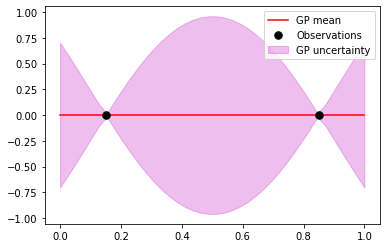

In [3]:
fig, ax = plt.subplots(1, 1)
xtrain = np.linspace(0.15, 0.85, 2)[:, None]
ytrain = np.array([0, 0])
gp = GP(xtrain, ytrain)
gp.set_hypers([5, 0.25])
x = np.linspace(0, 1, 40)[:, None]
y_gp = gp.mean(x)
y_var = np.sqrt(gp.variance(x))
_ = ax.plot(x, y_gp, color='r')
_ = ax.plot(xtrain, ytrain, 'k.', markersize=15)
_ = ax.fill_between(x[:, 0], y_gp - y_var, y_gp + y_var, color='m', alpha=0.25)
_ = ax.legend(['GP mean','Observations','GP uncertainty'])

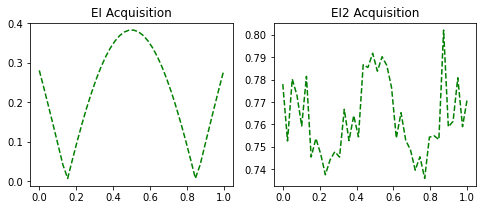

In [5]:
(fig, ax) = plt.subplots(1, 2, figsize=(8, 3))
ei = ExpectedImprovement(gp, opt_domain)
ei_vals = ei.evaluate_at_point_list(x)

# We estimate EI2 using 100 MC iterations, using grid search of size 50 to maximize the inner EI
ei2 = RolloutEI(gp, opt_domain, horizon=20, opt_mode='grid', mc_iters=20, grid_size=100)
ei2_vals = ei2.evaluate_at_point_list(x)

_ = ax[0].plot(x, ei_vals, '--g')
_ = ax[1].plot(x, ei2_vals, '--g')
_ = ax[0].set_title('EI Acquisition')
_ = ax[1].set_title('EI2 Acquisition')